In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Loading  dataset
res_df = pd.read_csv(r"C:\Users\Gayatri\OneDrive\Documents\Hotel Reservations.csv")
res_df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [2]:
res_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [3]:
res_df.describe(include='all').T.style

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36275,36275,INN00001,1,nan,nan,nan,nan,nan,nan,nan
no_of_adults,36275.000000,nan,nan,nan,1.844962,0.518715,0.000000,2.000000,2.000000,2.000000,4.000000
no_of_children,36275.000000,nan,nan,nan,0.105279,0.402648,0.000000,0.000000,0.000000,0.000000,10.000000
no_of_weekend_nights,36275.000000,nan,nan,nan,0.810724,0.870644,0.000000,0.000000,1.000000,2.000000,7.000000
no_of_week_nights,36275.000000,nan,nan,nan,2.204300,1.410905,0.000000,1.000000,2.000000,3.000000,17.000000
type_of_meal_plan,36275,4,Meal Plan 1,27835,nan,nan,nan,nan,nan,nan,nan
required_car_parking_space,36275.000000,nan,nan,nan,0.030986,0.173281,0.000000,0.000000,0.000000,0.000000,1.000000
room_type_reserved,36275,7,Room_Type 1,28130,nan,nan,nan,nan,nan,nan,nan
lead_time,36275.000000,nan,nan,nan,85.232557,85.930817,0.000000,17.000000,57.000000,126.000000,443.000000
arrival_year,36275.000000,nan,nan,nan,2017.820427,0.383836,2017.000000,2018.000000,2018.000000,2018.000000,2018.000000


In [4]:
res_df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [5]:
res_df.duplicated().sum()

0

In [6]:
del res_df['Booking_ID']

In [7]:
object_columns = [i for i in res_df.columns if res_df[i].dtype == 'object']
object_columns
num_col=[i for i in res_df.columns if res_df[i].dtype != 'object']
num_col

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [8]:
object_columns

['type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'booking_status']

In [9]:
res_df['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
lf=LabelEncoder()
res_df['type_of_meal_plan']=lf.fit_transform(res_df['type_of_meal_plan'])
res_df['room_type_reserved']=lf.fit_transform(res_df['room_type_reserved'])
res_df['market_segment_type']=lf.fit_transform(res_df['market_segment_type'])
res_df['booking_status']=lf.fit_transform(res_df['booking_status'])

In [11]:
res_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int32  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int32  
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [12]:
res_df['booking_status'].value_counts()

1    24390
0    11885
Name: booking_status, dtype: int64

In [13]:
booking_status= res_df.booking_status.value_counts()
print('Class 0:', booking_status[0])
print('Class 1:',booking_status[1])
print('Proportion:', round(booking_status[0] / booking_status[1], 2), ': 1')
print('Total HS Records:', len(res_df))

Class 0: 11885
Class 1: 24390
Proportion: 0.49 : 1
Total HS Records: 36275


In [14]:
X=res_df.iloc[:,:-1]
Y=res_df.iloc[:,-1:]

In [15]:
booking_status_UL = round(res_df.booking_status.mean() + 3 * res_df.booking_status.std(),3)
booking_status_LL = round(res_df.booking_status.mean() - 3 * res_df.booking_status.std(),3)
df_new =res_df[(res_df.booking_status > booking_status_LL) & (res_df.booking_status< booking_status_UL)]
df_bk = df_new
df_new.shape

(36275, 18)

In [16]:
res_df.shape

(36275, 18)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y
                                               ,test_size=0.4
                                            ,random_state=45)


In [18]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(X_train)    
x_test= st_x.transform(X_test) 

Model Name:  LogisticRegression()
Confusion matrix : 
 [[8679 1062]
 [2062 2707]]
Outcome values : 
 8679 1062 2062 2707
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.89      0.85      9741
           0       0.72      0.57      0.63      4769

    accuracy                           0.78     14510
   macro avg       0.76      0.73      0.74     14510
weighted avg       0.78      0.78      0.78     14510

Accuracy : 78.5 %
Precision : 80.8 %
Recall : 89.1 %
F1 Score : 0.847
Specificity or True Negative Rate : 56.8 %
Balanced Accuracy : 73.0 %
MCC : 0.491
roc_auc_score: 0.729


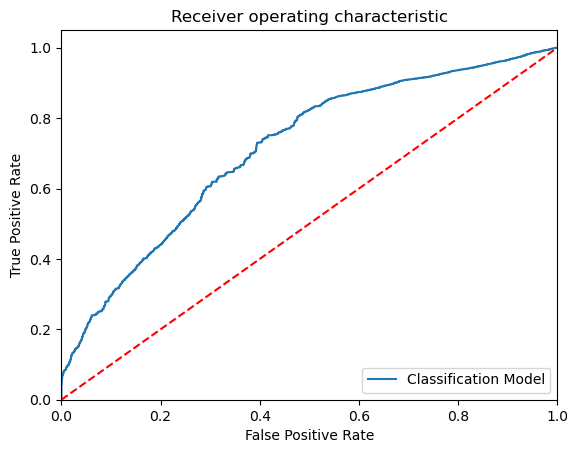

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[8687 1054]
 [ 964 3805]]
Outcome values : 
 8687 1054 964 3805
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.89      0.90      9741
           0       0.78      0.80      0.79      4769

    accuracy                           0.86     14510
   macro avg       0.84      0.84      0.84     14510
weighted avg       0.86      0.86      0.86     14510

Accuracy : 86.1 %
Precision : 90.0 %
Recall : 89.2 %
F1 Score : 0.896
Specificity or True Negative Rate : 79.8 %
Balanced Accuracy : 84.5 %
MCC : 0.686
roc_auc_score: 0.845


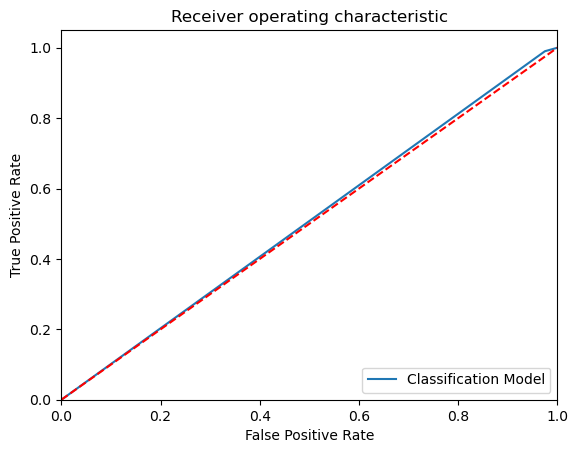

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[9214  527]
 [ 958 3811]]
Outcome values : 
 9214 527 958 3811
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.95      0.93      9741
           0       0.88      0.80      0.84      4769

    accuracy                           0.90     14510
   macro avg       0.89      0.87      0.88     14510
weighted avg       0.90      0.90      0.90     14510

Accuracy : 89.8 %
Precision : 90.6 %
Recall : 94.6 %
F1 Score : 0.925
Specificity or True Negative Rate : 79.9 %
Balanced Accuracy : 87.2 %
MCC : 0.764
roc_auc_score: 0.873


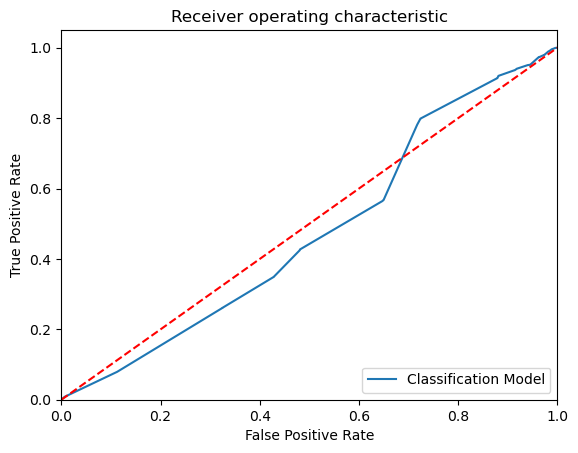

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[9114  627]
 [ 987 3782]]
Outcome values : 
 9114 627 987 3782
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.94      0.92      9741
           0       0.86      0.79      0.82      4769

    accuracy                           0.89     14510
   macro avg       0.88      0.86      0.87     14510
weighted avg       0.89      0.89      0.89     14510

Accuracy : 88.9 %
Precision : 90.2 %
Recall : 93.6 %
F1 Score : 0.919
Specificity or True Negative Rate : 79.3 %
Balanced Accuracy : 86.4 %
MCC : 0.744
roc_auc_score: 0.864


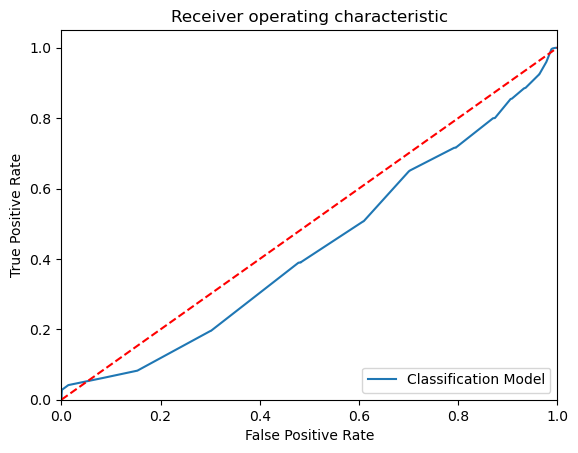

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[8678 1063]
 [1826 2943]]
Outcome values : 
 8678 1063 1826 2943
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.89      0.86      9741
           0       0.73      0.62      0.67      4769

    accuracy                           0.80     14510
   macro avg       0.78      0.75      0.76     14510
weighted avg       0.80      0.80      0.80     14510

Accuracy : 80.1 %
Precision : 82.6 %
Recall : 89.1 %
F1 Score : 0.857
Specificity or True Negative Rate : 61.7 %
Balanced Accuracy : 75.4 %
MCC : 0.534
roc_auc_score: 0.754


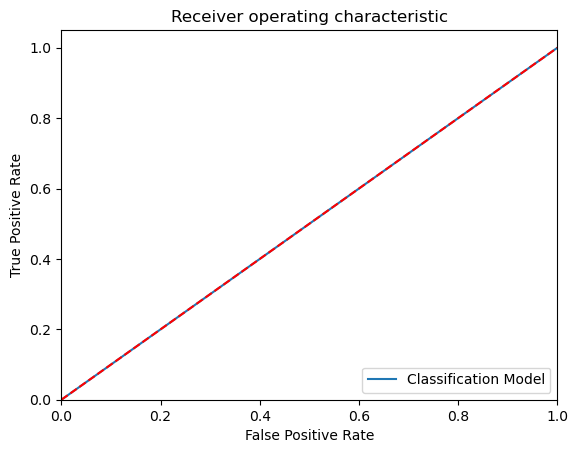

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[1895 7846]
 [ 117 4652]]
Outcome values : 
 1895 7846 117 4652
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.19      0.32      9741
           0       0.37      0.98      0.54      4769

    accuracy                           0.45     14510
   macro avg       0.66      0.59      0.43     14510
weighted avg       0.75      0.45      0.39     14510

Accuracy : 45.1 %
Precision : 94.2 %
Recall : 19.5 %
F1 Score : 0.322
Specificity or True Negative Rate : 97.5 %
Balanced Accuracy : 58.5 %
MCC : 0.231
roc_auc_score: 0.585


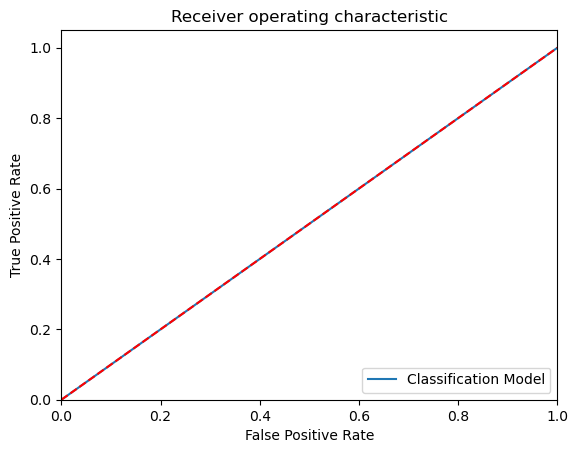

-----------------------------------------------------------------------------------------------------


In [19]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#from xgboost import XGBClassifier
# import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelGNB = GaussianNB()
#ModelSVM = SVC(probability=True)
#ModelXGB = XGBClassifier(n_estimators=100, max_depth=3, eval_metric='mlogloss')
#ModelLGB = lgb.LGBMClassifier()

# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM, modelXGB, modelLGB]
MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(X_train, Y_train)
    
    # Prediction
    
    y_pred = models.predict(X_test)
    y_pred_prob = models.predict_proba(X_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = Y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #---
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
   

In [20]:
#importing classificationModels
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
classifires = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(), 
    RandomForestClassifier(max_depth=5),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    AdaBoostClassifier(),
    KNeighborsClassifier(),
    XGBClassifier()

]

In [21]:
for model in classifires:
    print(model)
    model=model.fit(x_train, Y_train)
    y_predict_test = model.predict(x_test) 
    print(f'model test accuracy {accuracy_score(Y_test, y_predict_test)}')
    print(classification_report(Y_test, y_predict_test))
    print(confusion_matrix(Y_test, y_predict_test))
    print('____________________________________________________________________________________')
    

LogisticRegression()
model test accuracy 0.7997243280496209
              precision    recall  f1-score   support

           0       0.74      0.61      0.67      4769
           1       0.82      0.89      0.86      9741

    accuracy                           0.80     14510
   macro avg       0.78      0.75      0.76     14510
weighted avg       0.79      0.80      0.79     14510

[[2907 1862]
 [1044 8697]]
____________________________________________________________________________________
SVC()
model test accuracy 0.8346657477601654
              precision    recall  f1-score   support

           0       0.80      0.66      0.72      4769
           1       0.85      0.92      0.88      9741

    accuracy                           0.83     14510
   macro avg       0.82      0.79      0.80     14510
weighted avg       0.83      0.83      0.83     14510

[[3138 1631]
 [ 768 8973]]
____________________________________________________________________________________
DecisionTreeClass

In [22]:
#gridsearchcv
d=DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]
clf = GridSearchCV(d, forest_params, cv = 10, scoring='accuracy')

clf.fit(X_train, Y_train)

print(clf.best_params_)

print(clf.best_score_)

{'max_depth': 13, 'max_features': 11}
0.8723649990542841


In [23]:
l=LogisticRegression()
s=SVC()
r=RandomForestClassifier(),
e=ExtraTreesClassifier(),
g=GradientBoostingClassifier(),
ga=GaussianNB(),
ad=AdaBoostClassifier(),
kn=KNeighborsClassifier(),
xg=XGBClassifier()

<Axes: >

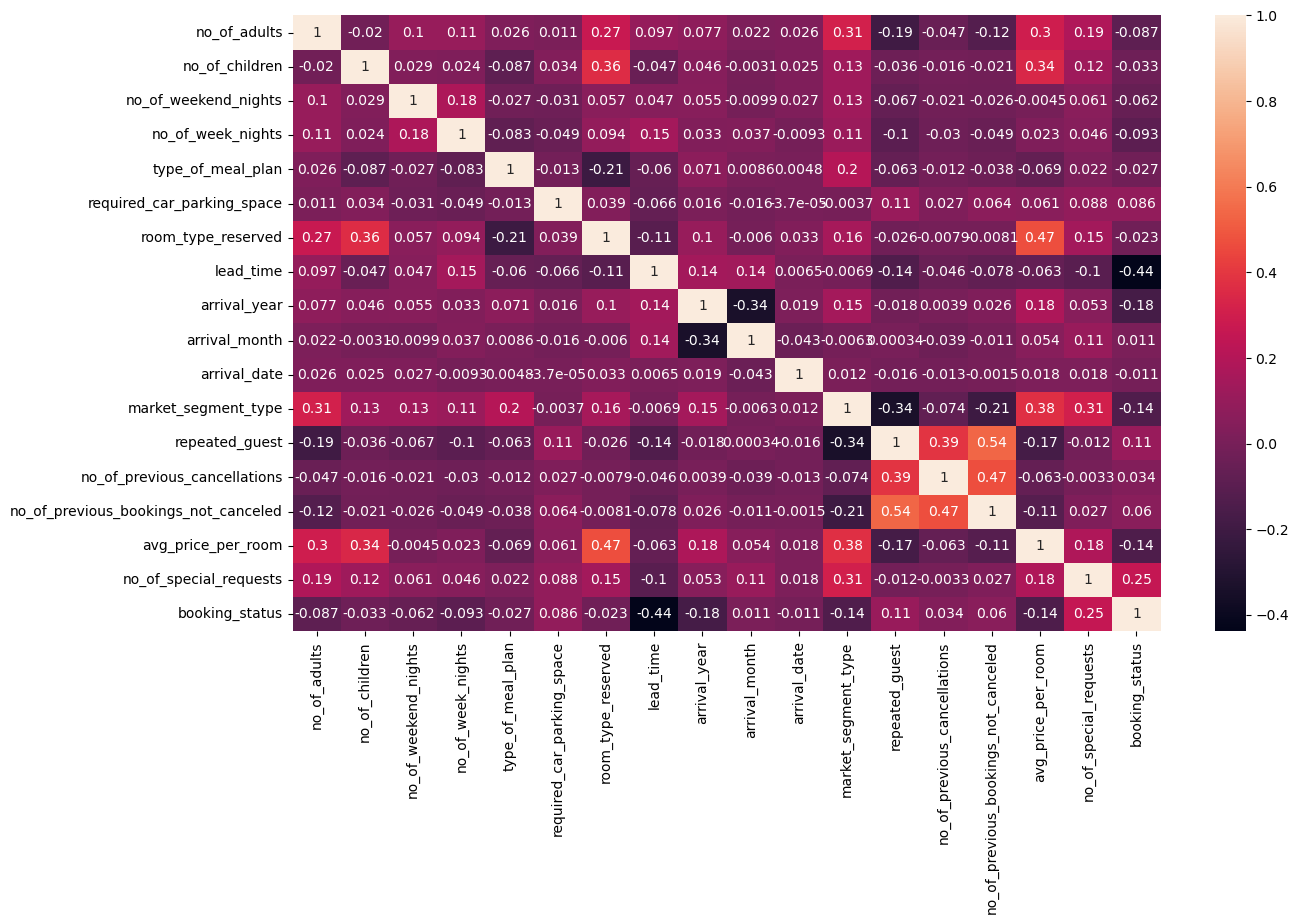

In [24]:
import seaborn as sns
plt.figure(figsize=(14,8))
sns.heatmap(res_df.corr(),annot=True)

In [25]:
#random searchcv for random forest
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Create a RandomForestClassifier object
rf = RandomForestClassifier()

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, cv=5)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train,Y_train)

# Print the best parameters and best score
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)


Best Parameters:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best Score:  0.898277050310131


In [26]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
}

# Create a GradientBoostingClassifier object
gb = GradientBoostingClassifier()

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=gb, param_distributions=param_grid, n_iter=10, cv=5)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train,Y_train)

# Print the best parameters and best score
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)


Best Parameters:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'learning_rate': 0.1}
Best Score:  0.8967608545830462


In [27]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute']
}

# Create a KNeighborsClassifier object
knn = KNeighborsClassifier()

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_grid, n_iter=10, cv=5)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train,Y_train)

# Print the best parameters and best score
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Parameters:  {'weights': 'distance', 'n_neighbors': 7, 'algorithm': 'kd_tree'}
Best Score:  0.8222375373305766


In [28]:
from scipy.stats import loguniform
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': loguniform(0.01, 10),
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

# Create a LogisticRegression object
lr = LogisticRegression()

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, n_iter=10, cv=5)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train,Y_train)

print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Parameters:  {'C': 2.3178314683018173, 'max_iter': 300, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score:  0.8053756030323914


In [29]:
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a DecisionTreeClassifier object
dt = DecisionTreeClassifier()

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_grid, n_iter=10, cv=5)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train,Y_train)

# Print the best parameters and best score
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)


Best Parameters:  {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best Score:  0.8558695152768205
